# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [4]:
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [5]:
from sklearn.model_selection import train_test_split

seed = 40 # rand seed
target = 'MEDV' # target column
bad_cols = [target] # columns to be taken out of X eg. target and non important columns
X, y = housing.drop(columns=bad_cols), housing[target]

X_train, X_test, y_train, y_test = train_test_split( # train, test split
    X, y,
    test_size= 0.2,
    random_state=seed
)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [6]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

lr_pred = lr_model.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [7]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print(f'r2 for this set is: {r2_score(y_test,lr_pred):.4f}')

r2 for this set is: 0.7010


## 4. Calculate and print mean squared error for both the training and the testing set.

In [8]:
print(f'The mean squared error for this set is: {mean_squared_error(y_test,lr_pred)}')

The mean squared error for this set is: 33.91996497518352


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [9]:
print(f'The mean absolute error for this set is: {mean_absolute_error(y_test,lr_pred)}')

The mean absolute error for this set is: 4.0674898082388715


## Classification Model Evaluation

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()

In [11]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [12]:
column_names = iris.feature_names

In [13]:
df = pd.DataFrame(iris['data'],columns=column_names)

In [14]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
target = pd.DataFrame(iris.target)
target

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [16]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [17]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [18]:
X, y = df, target

X_train, X_test, y_train, y_test = train_test_split( # train, test split
    X, y,
    test_size= 0.2,
    random_state=5
)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

lgr_model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

lgr_model.fit(X_train,y_train)
lgr_tpred = lgr_model.predict(X_train)
lgr_pred = lgr_model.predict(X_test)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [20]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, confusion_matrix, recall_score, f1_score, ConfusionMatrixDisplay

print(f"the accuracy score for the test set is: {accuracy_score(y_test,lgr_pred):.4f}")
print(f"the accuracy score for the train set is: {accuracy_score(y_train,lgr_tpred):.4f}")

the accuracy score for the test set is: 0.9000
the accuracy score for the train set is: 0.9750


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [21]:
print(f"the balanced accuracy score for the test set is: {balanced_accuracy_score(y_test,lgr_pred):.4f}")
print(f"the balanced accuracy score for the train set is: {balanced_accuracy_score(y_train,lgr_tpred):.4f}")

the balanced accuracy score for the test set is: 0.9091
the balanced accuracy score for the train set is: 0.9744


## 10. Calculate and print the precision score for both the training and the testing set.

In [22]:
print(f"the precision score for the test set is: {precision_score(y_test,lgr_pred, average='weighted'):.4f}")
print(f"the precision score for the train set is: {precision_score(y_train,lgr_tpred, average='weighted'):.4f}")

the precision score for the test set is: 0.9022
the precision score for the train set is: 0.9752


## 11. Calculate and print the recall score for both the training and the testing set.

In [23]:
print(f"the recall score for the test set is: {recall_score(y_test,lgr_pred, average='weighted'):.4f}")
print(f"the recall score for the train set is: {recall_score(y_train,lgr_tpred, average='weighted'):.4f}")

the recall score for the test set is: 0.9000
the recall score for the train set is: 0.9750


## 12. Calculate and print the F1 score for both the training and the testing set.

In [24]:
print(f"the F1 score for the test set is: {f1_score(y_test,lgr_pred, average='weighted'):.4f}")
print(f"the F1 score for the train set is: {f1_score(y_train,lgr_tpred, average='weighted'):.4f}")

the F1 score for the test set is: 0.8998
the F1 score for the train set is: 0.9750


## 13. Generate confusion matrices for both the training and the testing set.

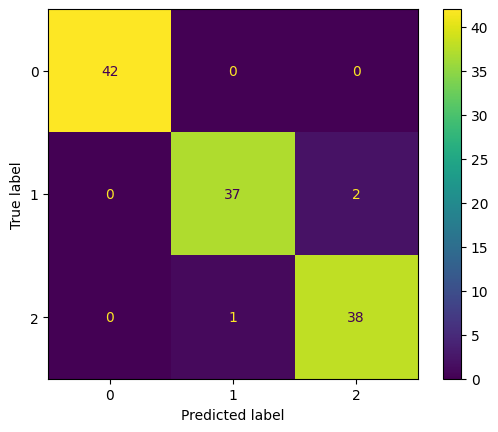

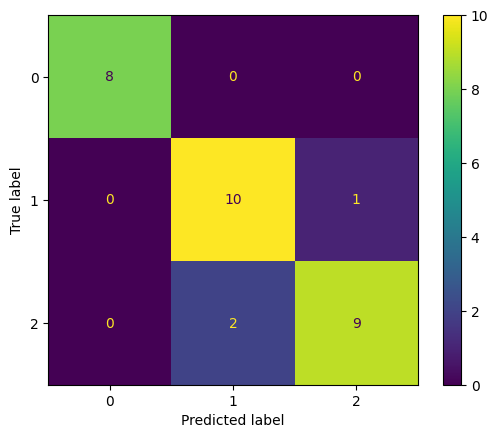

In [25]:
import matplotlib.pyplot as plt

cm_train = ConfusionMatrixDisplay(confusion_matrix(y_train,lgr_tpred))
cm_test = ConfusionMatrixDisplay(confusion_matrix(y_test,lgr_pred))

cm_train.plot()
cm_test.plot()
plt.show()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [26]:
# KNN for housing dataset
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

target = 'MEDV' # target column
bad_cols = [target] # columns to be taken out of X eg. target and non important columns
X, y = housing.drop(columns=bad_cols), housing[target]

X_train, X_test, y_train, housing_ytest = train_test_split( # train, test split
    X, y,
    test_size= 0.2, # 20% test, 80% train
    random_state=seed
)

knn_pipe = Pipeline([ # pipeline for KNN
    ('scaler', StandardScaler()), # scale data
    ('model', KNeighborsRegressor())
])

knn_grid = GridSearchCV(knn_pipe, # grid search for optimal k value
                         param_grid={'model__n_neighbors': [1,2,3,4,5,6,7,8,9]}, 
                         cv=5)

knn_grid.fit(X_train,y_train)
optimal_k = knn_grid.best_params_['model__n_neighbors'] # optimal k value

knn_model = Pipeline([ # new pipeline with optimal k value
    ('scaler', StandardScaler()),
    ('model', KNeighborsRegressor(n_neighbors=optimal_k))
])

knn_model.fit(X_train,y_train)
knn_pred = knn_model.predict(X_test) # predictions for test set

In [27]:
# Linear regression for iris dataset
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

X, y = load_iris(return_X_y=True) # load iris dataset and split into X and y

X_train, X_test, y_train, iris_ytest = train_test_split( # train, test split
    X, y,
    test_size= 0.2, # 20% test, 80% train
    random_state=seed
)

lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

lr_pred = lr_model.predict(X_test) # predictions for test set

KNN optimal k value: 5
KNN r2 for this set is: 0.7381
KNN mean squared error for this set is: 29.7057
KNN mean absolute error for this set is: 3.4669
-----------------------------
Linear regression r2 for this set is: 0.9235
Linear regression mean squared error for this set is: 0.0455
Linear regression mean absolute error for this set is: 0.1625
-----------------------------


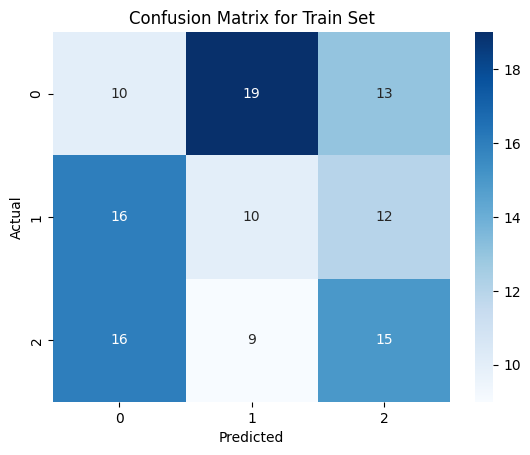

Text(50.722222222222214, 0.5, 'Actual')

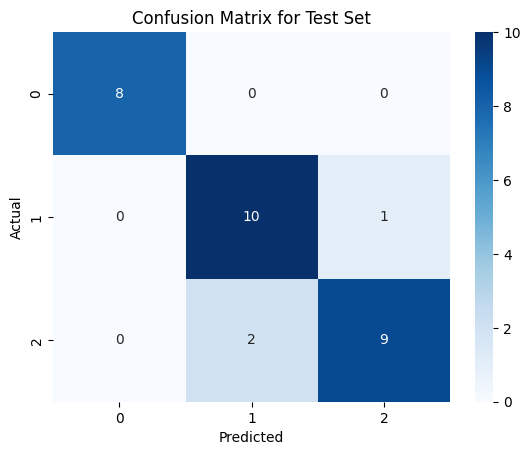

In [ ]:
import seaborn as sns
# Metrics for KNN and linear regression
print(f'KNN optimal k value: {optimal_k}')
print(f'KNN r2 for this set is: {r2_score(housing_ytest,knn_pred):.4f}')
print(f'KNN mean squared error for this set is: {mean_squared_error(housing_ytest,knn_pred):.4f}')
print(f'KNN mean absolute error for this set is: {mean_absolute_error(housing_ytest,knn_pred):.4f}')

print('-----------------------------') # separator for clarity

print(f'Linear regression r2 for this set is: {r2_score(iris_ytest,lr_pred):.4f}')
print(f'Linear regression mean squared error for this set is: {mean_squared_error(iris_ytest,lr_pred):.4f}')
print(f'Linear regression mean absolute error for this set is: {mean_absolute_error(iris_ytest,lr_pred):.4f}')

print('-----------------------------') # separator for clarity

# confusion matrices for KNN and linear regression without confusion maxitrix display and fuction
sns.heatmap(confusion_matrix(housing_ytest,lgr_tpred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Train Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
sns.heatmap(confusion_matrix(iris_ytest,lgr_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
